<a href="https://colab.research.google.com/github/sarahalyahya/SoftwareArt-Text/blob/main/TextOnImage_Sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multilingual Text on Combined Images
###Idea

For this sketch, we were asked to create a triptych that contains a multilingual text overlay. Inspired from our brief conversation about Arabizi last class, I was thinking about the impact that Arabizi has on the meaning of a statement originally in Arabic. In many cases, specifically with poetic or literary quotes, having the text printed in Arabic has much more impact than having it in Arabizi. Then, I started thinking of how some meaningful texts in Arabic make absolutely no sense when translated to English. So, I wanted to play around with PIL and create a visual that communicates this "decay" in meaning as we go from Arabic to Arabizi to English. I mainly relied on decreasing the contrast of a vivid image as a way to symbolize loss of meaning.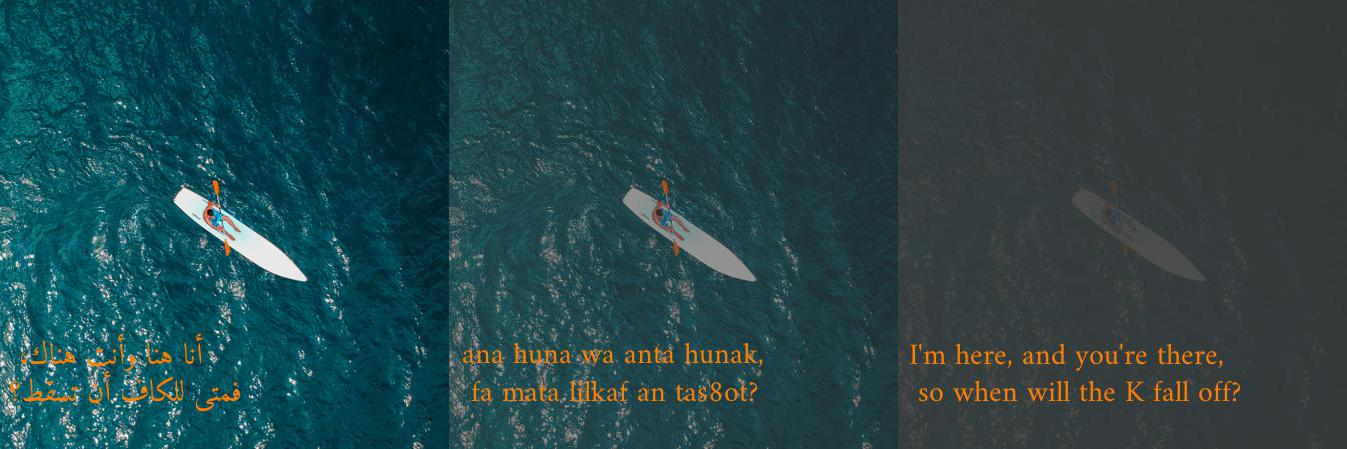 

###The Quote
To clarify, the quote "أنا هنا وأنت هناك، فمتى للكاف أن تسقط؟" is a play on words in Arabic employed to communicate someone missing the other. In Arabic the words "هنا" ("Here") and "هناك" ("There") only have a one letter difference, and the quote plays on that by saying something along the lines of "I'm here and you're there, when will that one letter fall off (or disappear?) so you can be here?" Obviously, since "Here" and "There" don't have the same relation as the Arabic words do, the quote makes no sense and doesn't have the same emotional impact, hence the decrease in contrast in the visual. 


In [ ]:
from PIL import Image, ImageDraw, ImageFont, ImageEnhance
!pip install --upgrade arabic-reshaper
!pip install python-bidi

import arabic_reshaper
from bidi.algorithm import get_display

Requirement already up-to-date: arabic-reshaper in /usr/local/lib/python3.7/dist-packages (2.1.1)


In [ ]:
font_filename = 'Amiri-Regular.ttf'
!wget -N https://github.com/NYUAD-IM/Software-Art-Text/raw/main/media/Amiri-Regular.ttf

--2021-02-28 20:12:17--  https://github.com/NYUAD-IM/Software-Art-Text/raw/main/media/Amiri-Regular.ttf
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/NYUAD-IM/Software-Art-Text/main/media/Amiri-Regular.ttf [following]
--2021-02-28 20:12:18--  https://raw.githubusercontent.com/NYUAD-IM/Software-Art-Text/main/media/Amiri-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553832 (541K) [application/octet-stream]
Saving to: ‘Amiri-Regular.ttf’

Amiri-Regular.ttf   100%[===================>] 540.85K  --.-KB/s    in 0.05s   

Last-modified header missing -- time-stamps turned off.
2021-02-2

In [ ]:

image_filename = 'picture.jpg?raw=true'
!wget -N https://github.com/sarahalyahya/sarahalyahya.github.io/blob/main/picture.jpg?raw=true


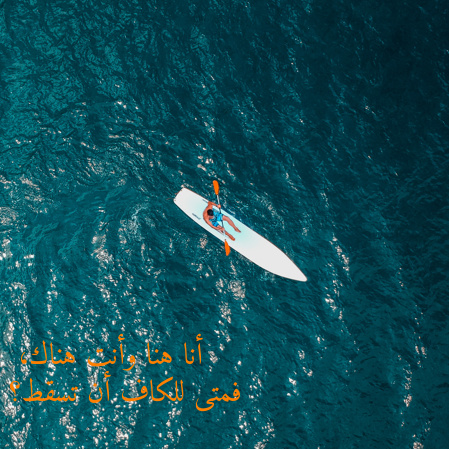

In [ ]:
img = Image.open(image_filename)
resized_img = img.resize((round(img.size[0]*0.2), round(img.size[1]*0.2)))

font_size = 30
message = u'أنا هنا وأنت هناك، \nفمتى للكاف أن تسقط؟'
rgb_color = (0,0,0)


draw = ImageDraw.Draw(resized_img)
font = ImageFont.truetype(font_filename, font_size)

# Find out how large our text will be
text_width, text_height = draw.textsize(message, font)

# Unfortunately the text will be drawn with
# some extra space on top, so we need to adjust for that
# See https://stackoverflow.com/questions/55773962/pillow-how-to-put-the-text-in-the-center-of-the-image
# We add 21% to the calculated size
text_height = text_height + text_height * .21

# Adjust where we draw the text
# For our left coordinate we take the center of the image and subtract half
# the text width. Similarly for the height.
left = (resized_img.width / 10) - (text_width / 10)
top = (resized_img.height/2) - (text_height/2) + 150

reshaped_text = arabic_reshaper.reshape(message)    
bidi_text = get_display(reshaped_text) 
draw.text((left, top), bidi_text, font=font, fill =(255,128,0))
draw = ImageDraw.Draw(resized_img)
resized_img.save("Arabic.jpg")
resized_img


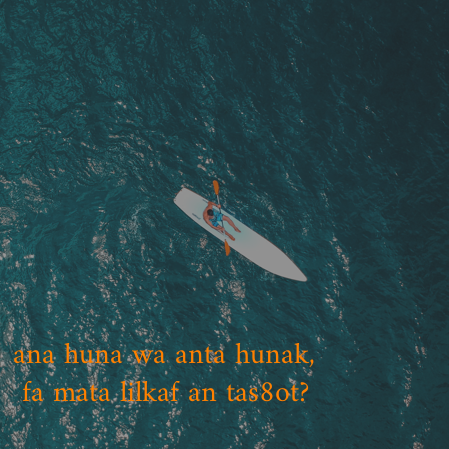

In [ ]:
resized_img2 = img.resize((round(img.size[0]*0.2), round(img.size[1]*0.2)))

font_size = 30
message = u'ana huna wa anta hunak, \n fa mata lilkaf an tas8ot?'
rgb_color = (0,0,0)
contrast = ImageEnhance.Contrast(resized_img2)

resized_img2 = contrast.enhance(0.5)


draw = ImageDraw.Draw(resized_img2)
font = ImageFont.truetype(font_filename, font_size)

text_width, text_height = draw.textsize(message, font)


text_height = text_height + text_height * .21


left = (resized_img2.width / 10) - (text_width / 10)
top = (resized_img2.height/2) - (text_height/2) + 150

draw.text((left, top), message, font=font, fill =(255,128,0))
draw = ImageDraw.Draw(resized_img2)
resized_img2.save("Arabizi.jpg")
resized_img2

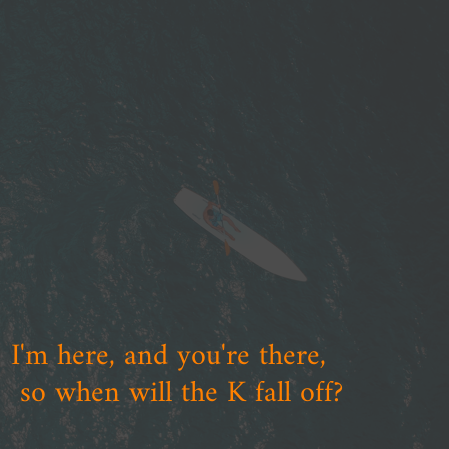

In [ ]:
resized_img3 = img.resize((round(img.size[0]*0.2), round(img.size[1]*0.2)))

font_size = 30
message = u"I'm here, and you're there, \n so when will the K fall off?"
rgb_color = (0,0,0)
contrast = ImageEnhance.Contrast(resized_img3)

resized_img3 = contrast.enhance(0.1)


draw = ImageDraw.Draw(resized_img3)
font = ImageFont.truetype(font_filename, font_size)


text_width, text_height = draw.textsize(message, font)


text_height = text_height + text_height * .21


left = (resized_img3.width / 10) - (text_width / 10)
top = (resized_img3.height/2) - (text_height/2) + 150

draw.text((left, top), message, font=font, fill =(255,128,0))
draw = ImageDraw.Draw(resized_img2)
resized_img3.save("English.jpg")
resized_img3

In [ ]:
def combine_images(filename_list, output_filename):
  images = [Image.open(x) for x in filename_list]
  widths, heights = zip(*(i.size for i in images))

  total_width = sum(widths)
  max_height = max(heights)

  new_im = Image.new('RGB', (total_width, max_height))

  x_offset = 0
  for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]

  new_im.save(output_filename)

  output_filename = 'combined.jpg'


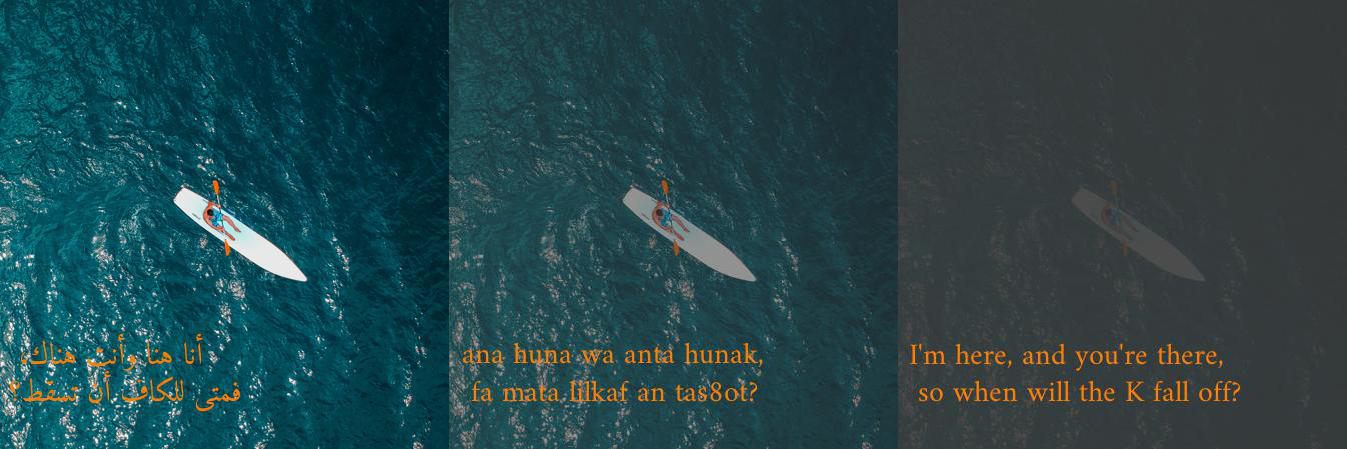

In [ ]:
combine_images(['Arabic.jpg', 'Arabizi.jpg', 'English.jpg'], 'combined.jpg')

image = Image.open('combined.jpg') # open the output image
image